In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    })

colors = [(0.2298057,0.298717966,0.753683153),
          (0.3634607953411765,0.4847836818509804,0.9010188868941177),
          (0.5108243242509803,0.6493966148235294,0.9850787763764707),
          (0.6672529243333334,0.7791764569999999,0.992959213),
          (0.8049647588235295,0.8516661605568627,0.9261650744313725),
          (0.9193759889058823,0.8312727235294118,0.7828736304470588),
          (0.968203399,0.7208441,0.6122929913333334),
          (0.9440545734235294,0.5531534787490197,0.4355484903137255),
          (0.8523781350078431,0.34649194649411763,0.2803464686980392),
          (0.705673158,0.01555616,0.150232812)]
colors = ['b','r','k','g','m','c','tab:brown','tab:orange','tab:pink','tab:gray','tab:olive','tab:purple']

markers = ["v","o","^","1","*",">","d","<","s","P","X"]
FONTSIZE = 22

Adaptation training loss

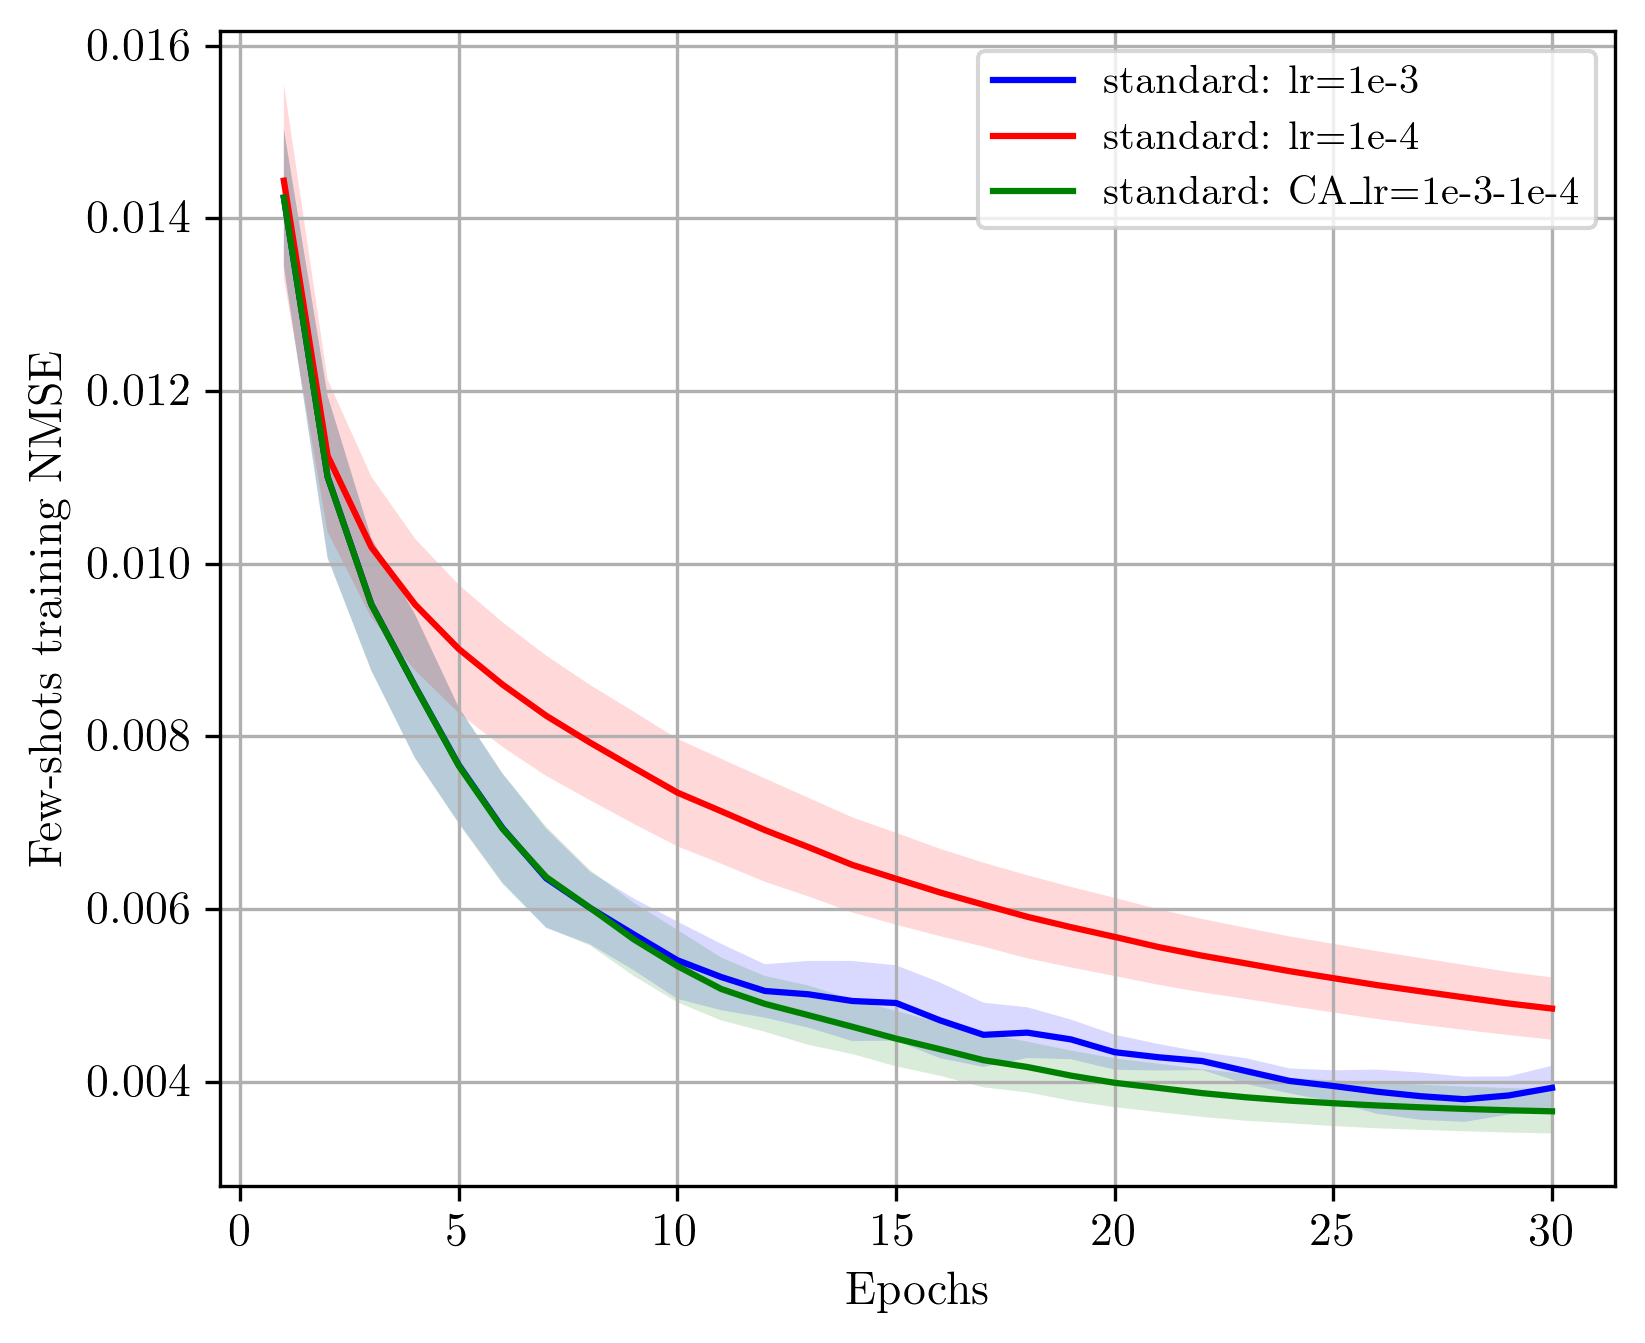

In [23]:
data1 = []
data2 = []
data3 = []

for i in range(1,4):
    # read csv
    filename1 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lr0.001_Q1_seed{i}-tag-Adaptation training NMSE.csv"
    df1 = pd.read_csv(filename1)
    # extract value
    values1 = df1['Value'].values
    data1.append(values1)
    # read csv
    filename2 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lr0.0001_Q1_seed{i}-tag-Adaptation training NMSE.csv"
    df2 = pd.read_csv(filename2)
    # extract value
    values2 = df2['Value'].values
    data2.append(values2)    
    # read csv
    filename3 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lrCA0.001_Q1_seed{i}-tag-Adaptation training NMSE.csv"
    df3 = pd.read_csv(filename3)
    # extract value
    values3 = df3['Value'].values
    data3.append(values3)

    
# mean and std
mean_values1 = np.mean(data1, axis=0)
std_values1 = np.std(data1, axis=0)
mean_values2 = np.mean(data2, axis=0)
std_values2 = np.std(data2, axis=0)
mean_values3 = np.mean(data3, axis=0)
std_values3 = np.std(data3, axis=0)

plt.figure(figsize=(6,5),dpi=300)

# alpha: transparency 
plt.plot(range(1, 31), mean_values1, color=colors[0], label='standard: lr=1e-3')
plt.fill_between(range(1, 31), mean_values1 - std_values1, mean_values1 + std_values1, color=colors[0], alpha=0.15, edgecolor=None)
plt.plot(range(1, 31), mean_values2, color=colors[1], label='standard: lr=1e-4')
plt.fill_between(range(1, 31), mean_values2 - std_values2, mean_values2 + std_values2, color=colors[1], alpha=0.15, edgecolor=None)
plt.plot(range(1, 31), mean_values3, color=colors[3], label='standard: CA_lr=1e-3-1e-4')
plt.fill_between(range(1, 31), mean_values3 - std_values3, mean_values3 + std_values3, color=colors[3], alpha=0.15, edgecolor=None)

plt.tick_params(axis='both', which='major', labelsize=FONTSIZE/2)
plt.tick_params(axis='both', which='minor', labelsize=(FONTSIZE-2)/2)
plt.xlabel('Epochs',fontsize=FONTSIZE/2)
plt.ylabel('Few-shots training NMSE',fontsize=FONTSIZE/2)
#plt.title('Out-of-distribution Q1 Adaptation', fontsize = FONTSIZE/2)
plt.legend(fontsize = (FONTSIZE-3)/2)
plt.grid(True)
plt.show()


Testing NMSE

In [24]:
data1 = []
data2 = []
data3 = []

for i in range(1,4):
    # read csv
    filename1 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lr0.001_Q1_seed{i}-tag-Testing NMSE.csv"
    df1 = pd.read_csv(filename1)
    # extract value
    values1 = df1['Value'].values
    data1.append(values1)
    # read csv
    filename2 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lr0.0001_Q1_seed{i}-tag-Testing NMSE.csv"
    df2 = pd.read_csv(filename2)
    # extract value
    values2 = df2['Value'].values
    data2.append(values2)    
    # read csv
    filename3 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lrCA0.001_Q1_seed{i}-tag-Testing NMSE.csv"
    df3 = pd.read_csv(filename3)
    # extract value
    values3 = df3['Value'].values
    data3.append(values3)

    
# mean and std
mean_values1 = np.mean(data1, axis=0)
std_values1 = np.std(data1, axis=0)
mean_values2 = np.mean(data2, axis=0)
std_values2 = np.std(data2, axis=0)
mean_values3 = np.mean(data3, axis=0)
std_values3 = np.std(data3, axis=0)



min_index1 = np.argmin(mean_values1)
print('MAML min NMSE: ',  round(mean_values1[min_index1], 4))
print('MAML stand diviation: ', round(std_values1[min_index1], 4))
print('MAML epoch: ', min_index1)
min_index2 = np.argmin(mean_values2)
print('MAML min NMSE: ',  round(mean_values2[min_index2], 4))
print('MAML stand diviation: ', round(std_values2[min_index2], 4))
print('MAML epoch: ', min_index2)
min_index3 = np.argmin(mean_values3)
print('MAML min NMSE: ',  round(mean_values3[min_index3], 4))
print('MAML stand diviation: ', round(std_values3[min_index3], 4))
print('MAML epoch: ', min_index3)

MAML min NMSE:  0.0109
MAML stand diviation:  0.0002
MAML epoch:  6
MAML min NMSE:  0.0113
MAML stand diviation:  0.0001
MAML epoch:  8
MAML min NMSE:  0.0109
MAML stand diviation:  0.0001
MAML epoch:  11


In [16]:
print('Standard init NMSE: ',  round(mean_values2[0], 4))
print('Standard stand diviation: ', round(std_values2[0], 4))

print('MAML init NMSE: ',  round(mean_values1[0], 4))
print('MAML stand diviation: ', round(std_values1[0], 4))

Standard init NMSE:  0.0178
Standard stand diviation:  0.0
MAML init NMSE:  0.0178
MAML stand diviation:  0.0


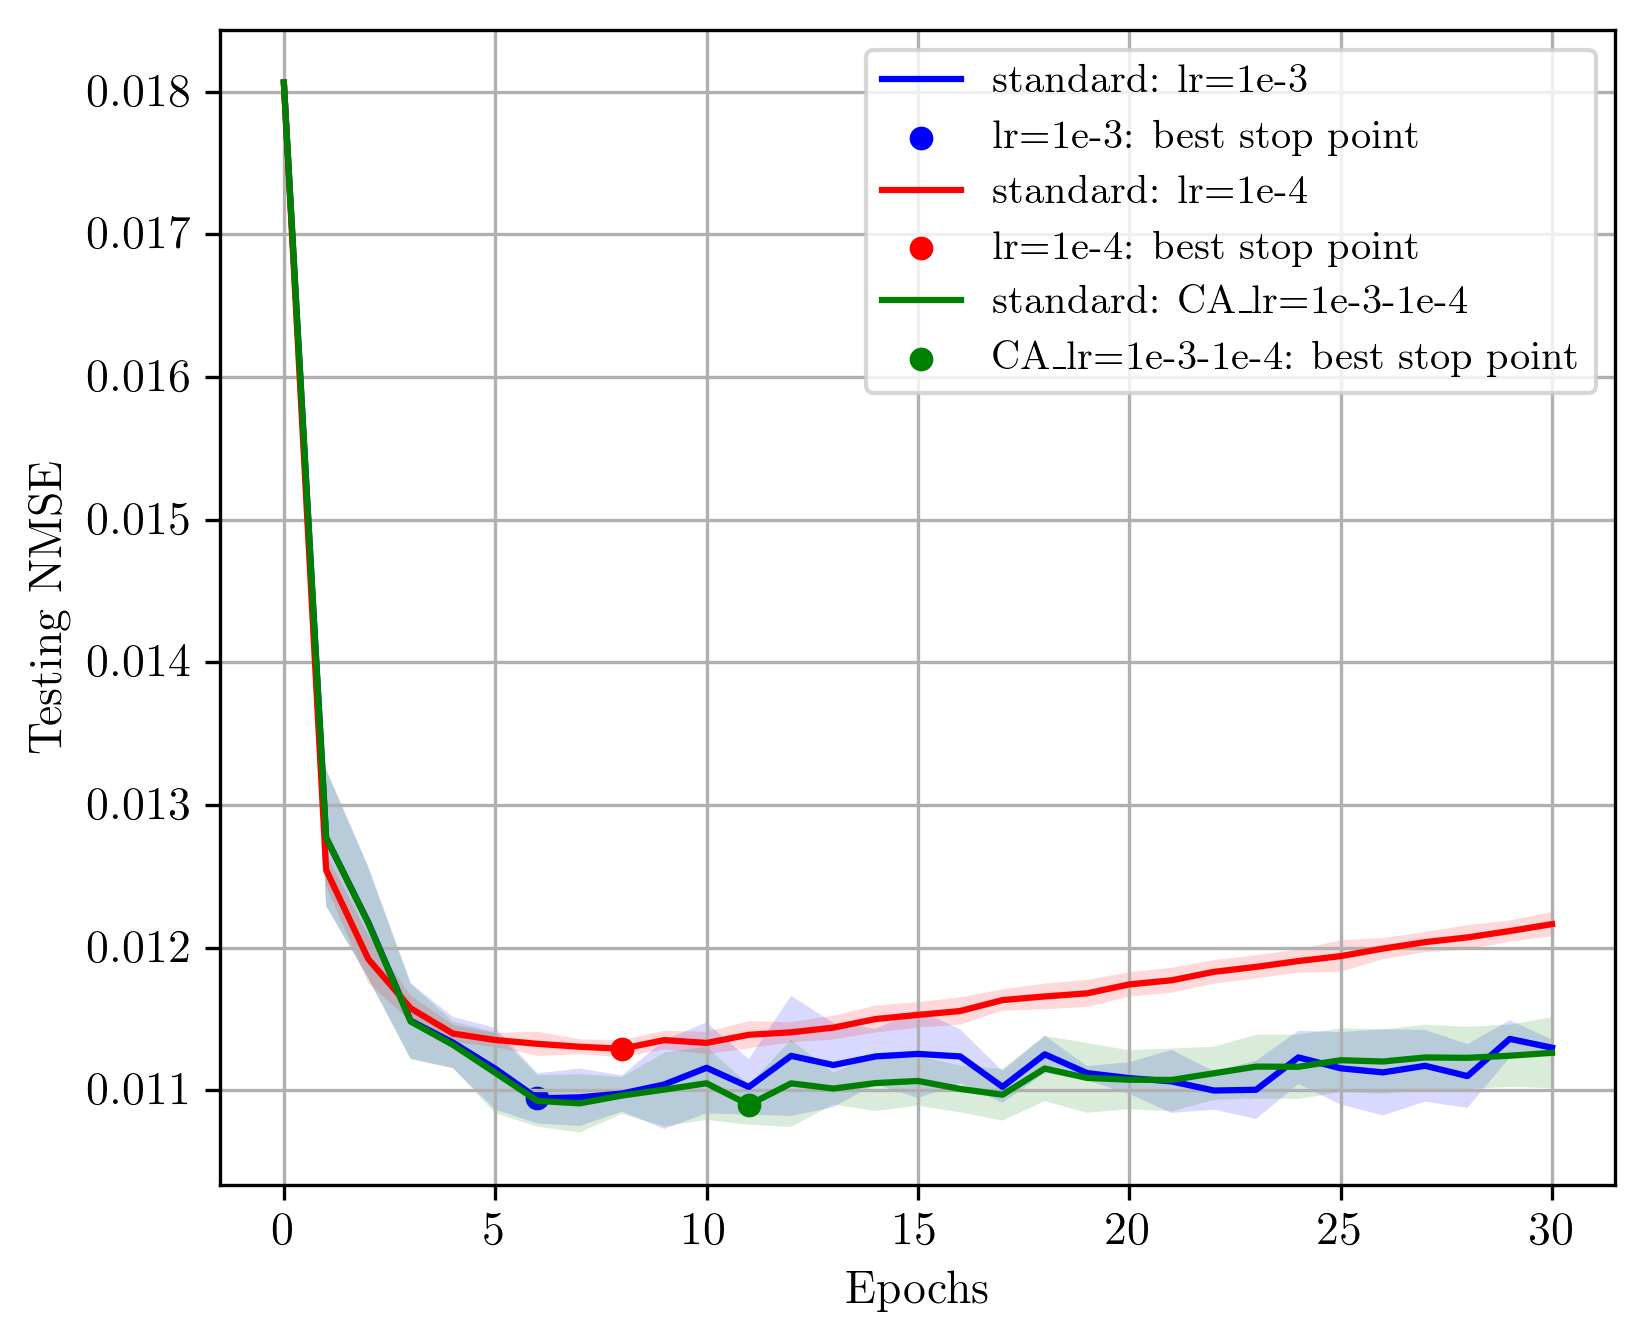

In [26]:
plt.figure(figsize=(6,5),dpi=300)

# alpha: transparency 
plt.plot(range(0, 31), mean_values1, color=colors[0], label='standard: lr=1e-3')
plt.fill_between(range(0, 31), mean_values1 - std_values1, mean_values1 + std_values1, color=colors[0], alpha=0.15, edgecolor=None)
plt.scatter(6, mean_values1[6], color=colors[0], s=FONTSIZE, label = 'lr=1e-3: best stop point')

plt.plot(range(0, 31), mean_values2, color=colors[1], label='standard: lr=1e-4')
plt.fill_between(range(0, 31), mean_values2 - std_values2, mean_values2 + std_values2, color=colors[1], alpha=0.15, edgecolor=None)
plt.scatter(8, mean_values2[8], color=colors[1], s=FONTSIZE, label = 'lr=1e-4: best stop point')

plt.plot(range(0, 31), mean_values3, color=colors[3], label='standard: CA_lr=1e-3-1e-4')
plt.fill_between(range(0, 31), mean_values3 - std_values3, mean_values3 + std_values3, color=colors[3], alpha=0.15, edgecolor=None)
plt.scatter(11, mean_values3[11], color=colors[3], s=FONTSIZE, label = 'CA_lr=1e-3-1e-4: best stop point')

plt.tick_params(axis='both', which='major', labelsize=FONTSIZE/2)
plt.tick_params(axis='both', which='minor', labelsize=(FONTSIZE-2)/2)
plt.xlabel('Epochs',fontsize=FONTSIZE/2)
plt.ylabel('Testing NMSE',fontsize=FONTSIZE/2)
#plt.title('Out-of-distribution Q3 Adaptation', fontsize = FONTSIZE/2)
plt.legend(fontsize = (FONTSIZE-3)/2)
plt.grid(True)
plt.show()

Testing SSIM

In [28]:
data1 = []
data2 = []
data3 = []

for i in range(1,4):
    # read csv
    filename1 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lr0.001_Q1_seed{i}-tag-Testing SSIM.csv"
    df1 = pd.read_csv(filename1)
    # extract value
    values1 = df1['Value'].values
    data1.append(values1)
    # read csv
    filename2 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lr0.0001_Q1_seed{i}-tag-Testing SSIM.csv"
    df2 = pd.read_csv(filename2)
    # extract value
    values2 = df2['Value'].values
    data2.append(values2)    
    # read csv
    filename3 = f"/cheng/metaMRI/metaMRI/save/Conclusion 1/adapt_lr_selection/run-metaMRI_save_E_sup_standard_few-adapt_lrCA0.001_Q1_seed{i}-tag-Testing SSIM.csv"
    df3 = pd.read_csv(filename3)
    # extract value
    values3 = df3['Value'].values
    data3.append(values3)

    
# mean and std
mean_values1 = np.mean(data1, axis=0)
std_values1 = np.std(data1, axis=0)
mean_values2 = np.mean(data2, axis=0)
std_values2 = np.std(data2, axis=0)
mean_values3 = np.mean(data3, axis=0)
std_values3 = np.std(data3, axis=0)


print('Initial performance')
print('Standard min NMSE: ',  round(mean_values2[0], 4))
print('Standard stand diviation: ', round(std_values2[0], 4))

print('MAML min NMSE: ',  round(mean_values1[0], 4))
print('MAML stand diviation: ', round(std_values1[0], 4))

Initial performance
Standard min NMSE:  0.8187
Standard stand diviation:  0.0
MAML min NMSE:  0.8187
MAML stand diviation:  0.0


In [54]:
print('Initial performance')
print('Standard min SSIM: ',  round(mean_values2[17], 4))
print('Standard stand diviation: ', round(std_values2[17], 4))

print('MAML min SSIM: ',  round(mean_values1[4], 4))
print('MAML stand diviation: ', round(std_values1[4], 4))

Initial performance
Standard min SSIM:  0.8804
Standard stand diviation:  0.0003
MAML min SSIM:  0.8812
MAML stand diviation:  0.0006


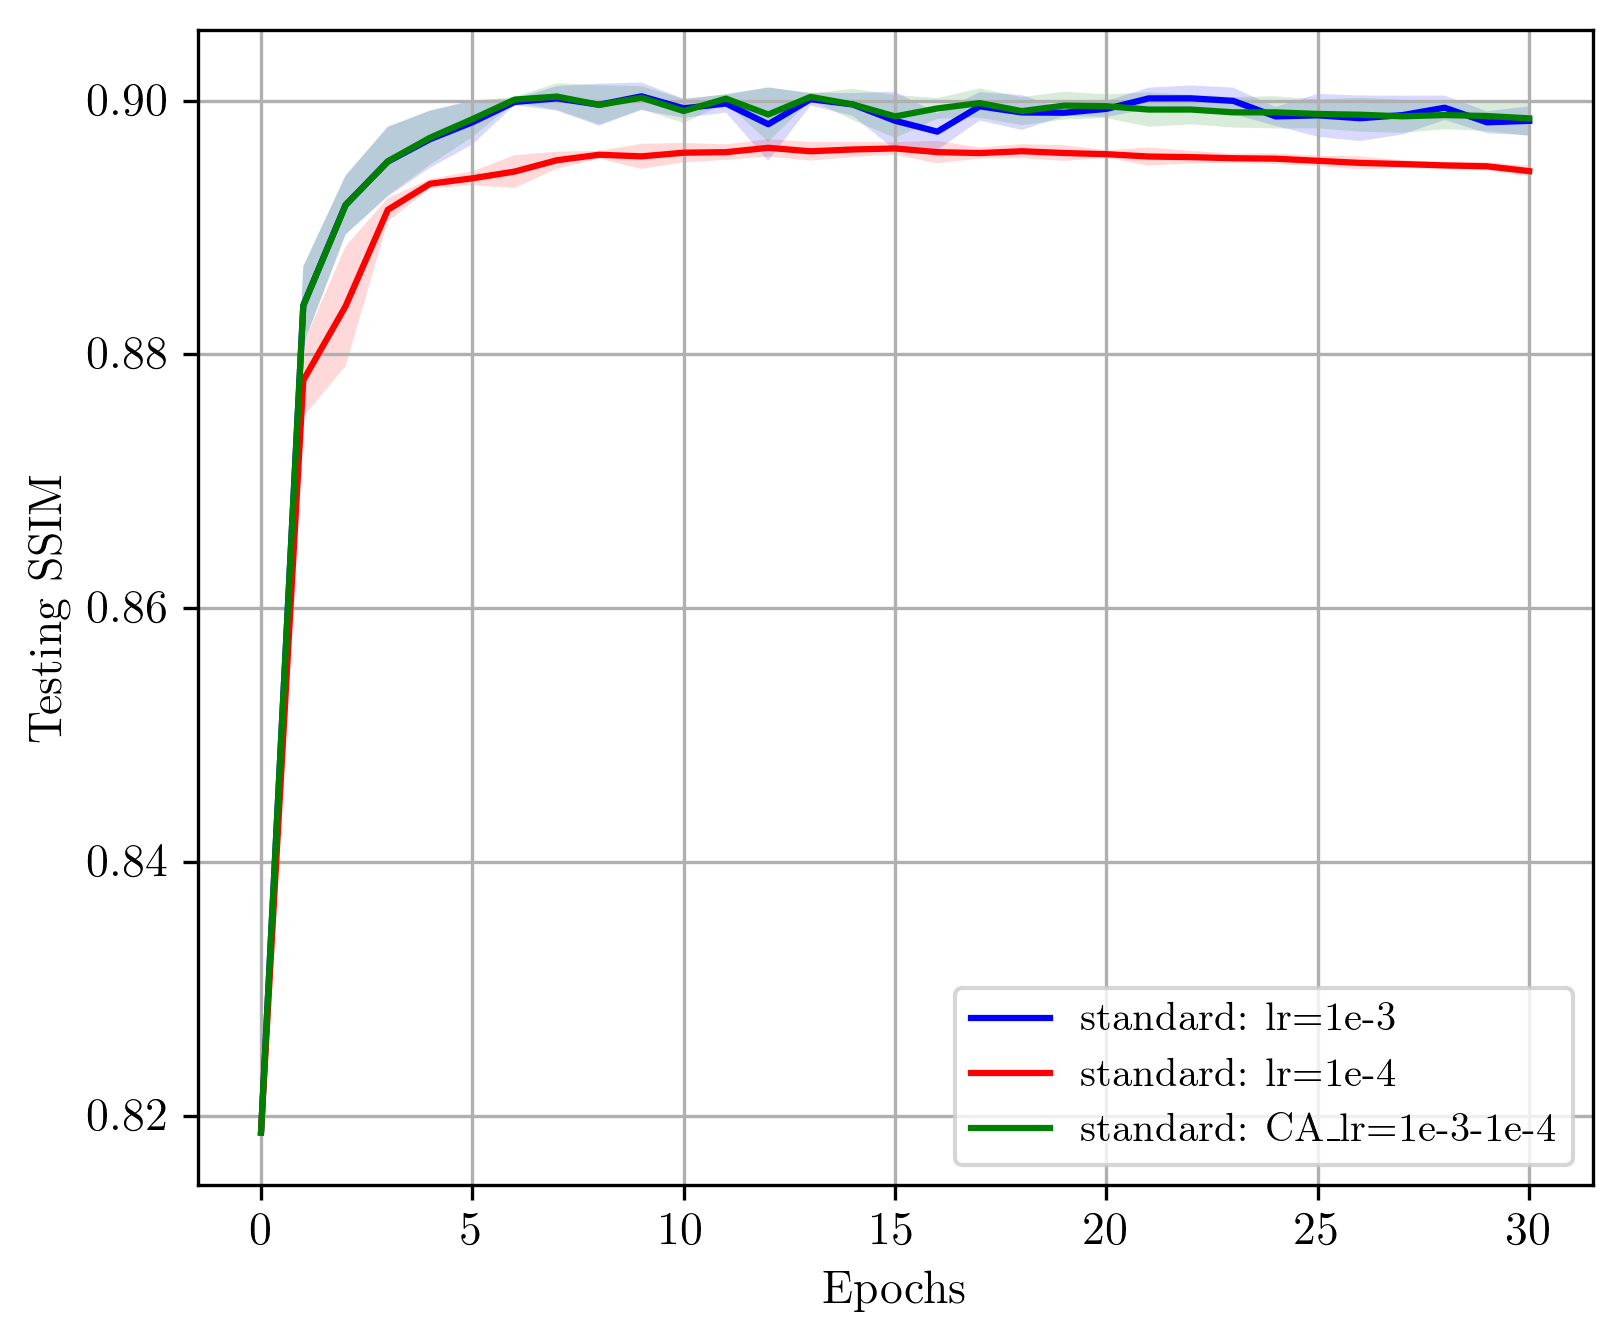

In [29]:
plt.figure(figsize=(6,5),dpi=300)

# alpha: transparency 
plt.plot(range(0, 31), mean_values1, color=colors[0], label='standard: lr=1e-3')
plt.fill_between(range(0, 31), mean_values1 - std_values1, mean_values1 + std_values1, color=colors[0], alpha=0.15, edgecolor=None)
plt.plot(range(0, 31), mean_values2, color=colors[1], label='standard: lr=1e-4')
plt.fill_between(range(0, 31), mean_values2 - std_values2, mean_values2 + std_values2, color=colors[1], alpha=0.15, edgecolor=None)
plt.plot(range(0, 31), mean_values3, color=colors[3], label='standard: CA_lr=1e-3-1e-4')
plt.fill_between(range(0, 31), mean_values3 - std_values3, mean_values3 + std_values3, color=colors[3], alpha=0.15, edgecolor=None)

plt.tick_params(axis='both', which='major', labelsize=FONTSIZE/2)
plt.tick_params(axis='both', which='minor', labelsize=(FONTSIZE-2)/2)
plt.xlabel('Epochs',fontsize=FONTSIZE/2)
plt.ylabel('Testing SSIM',fontsize=FONTSIZE/2)
#plt.title('Out-of-distribution Q3 Adaptation', fontsize = FONTSIZE/2)
plt.legend(fontsize = (FONTSIZE-3)/2)
plt.grid(True)
plt.show()